
Sub Graph:


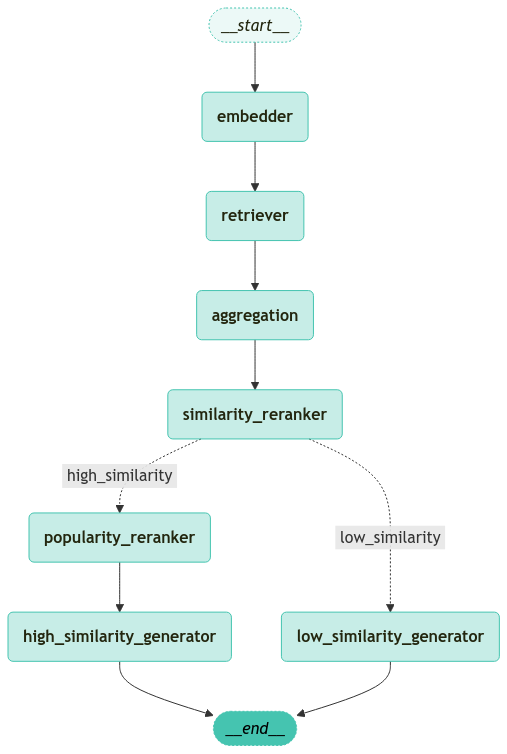

Main Graph:


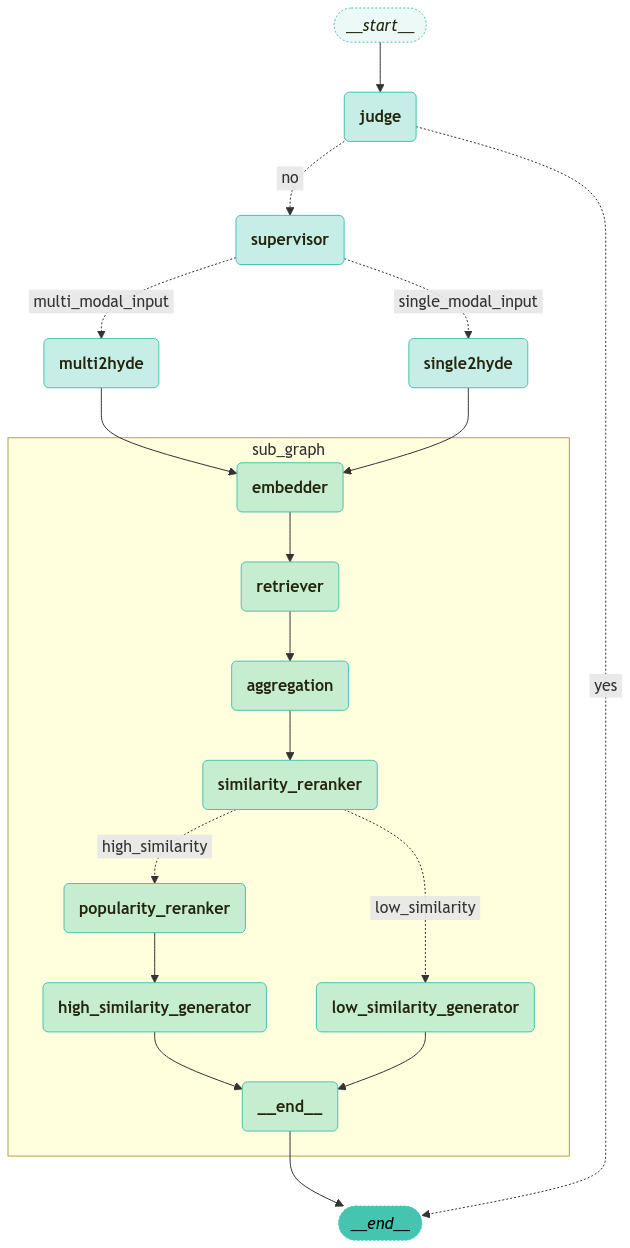


Rewrite Graph:


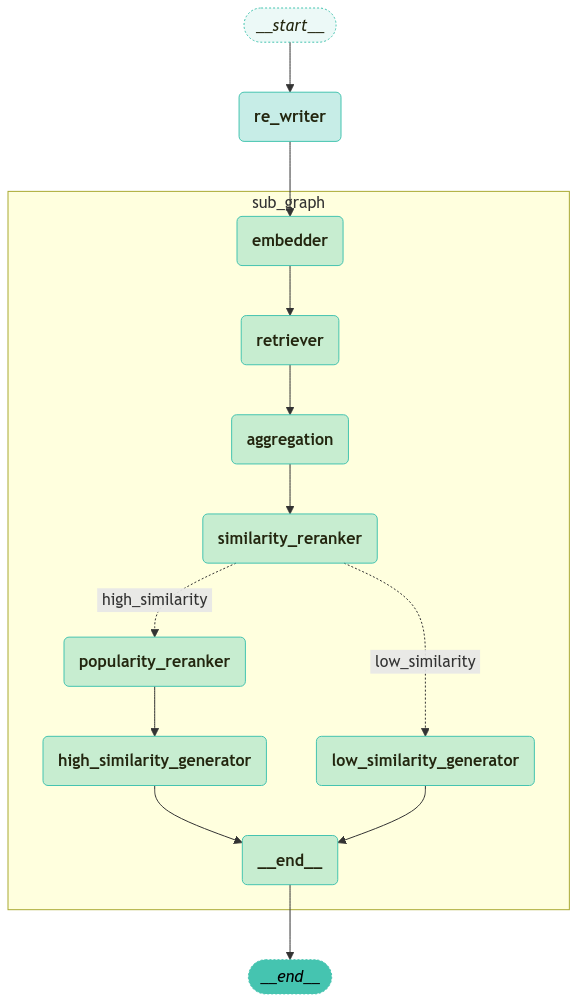

In [10]:
# 2. 필요한 import
import os
import boto3
from dotenv import load_dotenv
from langchain_teddynote.graphs import visualize_graph
from muse_chat.chat import MuseChatGraph

# 3. 환경 변수 설정
def __set_api_key():
    for i in [
        "MONGO_URI",
        "MONGO_DB_NAME",
        "MONGO_VECTOR_DB_NAME",
        "UPSTAGE_API_KEY",
        "COHERE_API_KEY",
        "OPENAI_API_KEY",
        "LANGCHAIN_TRACING_V2",
        "LANGCHAIN_ENDPOINT",
        "LANGCHAIN_API_KEY",
        "LANGCHAIN_PROJECT",
    ]:
        if not os.environ.get(i):
            ssm = boto3.client("ssm")
            parameter = ssm.get_parameter(
                Name=f"/DEV/CICD/MUSEIFY/{i}", WithDecryption=True
            )
            os.environ[i] = parameter["Parameter"]["Value"]

# 4. 환경 변수 설정 실행
load_dotenv()
__set_api_key()

# 5. MongoDB 연결 설정
from shared.mongo_base import MongoBase
MongoBase.initialize(
    os.getenv("MONGO_URI"),
    os.getenv("MONGO_DB_NAME"),
    os.getenv("MONGO_VECTOR_DB_NAME"),
)

# 6. 그래프 시각화
chat = MuseChatGraph()

# 서브 그래프 시각화
print("\nSub Graph:")
visualize_graph(chat.sub_graph)

# 메인 그래프 시각화
print("Main Graph:")
visualize_graph(chat.main_graph, xray=True)

# 재작성 그래프 시각화
print("\nRewrite Graph:")
visualize_graph(chat.rewrite_graph, xray=True)